In [1]:
import csv
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt
import numpy as np


In [2]:
"""Insert parameters here."""

frames2secs = 1/80
pix2micron = 1.21
data_file = 'generator.csv'


In [3]:
"""Extract the data from the specific file and store them in the dataframe."""

df = pd.DataFrame()

with open(data_file, 'r') as file:
    reader = csv.reader(file)
    for data in reader:
        df = df.append([{
            'x': float(data[0][0:15]),
            'y': float(data[0][22:]),
            'x-micron': float(data[0][0:15])*pix2micron,
            'y-micron': float(data[0][22:])*pix2micron
        }])

df['frame'] = [i for i in range(0,len(df))]
# df['frame'] *= frames2secs

df['particle'] = [0]*len(df)
        


C:\Users\keith\AppData\Local\Temp\ipykernel_3136\3949458467.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{
C:\Users\keith\AppData\Local\Temp\ipykernel_3136\3949458467.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{
C:\Users\keith\AppData\Local\Temp\ipykernel_3136\3949458467.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{
C:\Users\keith\AppData\Local\Temp\ipykernel_3136\3949458467.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{
C:\Users\keith\AppData\Local\Temp\ipykernel_3136\3949458467.py:8: FutureWarning: The frame.append method is deprecated and w

In [4]:
df

,x,y,x-micron,y-micron,frame,particle
0,0.116280,0.004452,0.140699,0.005387,0,0
0,0.060961,0.149851,0.073763,0.181319,1,0
0,0.176588,0.225558,0.213672,0.272925,2,0
0,0.005014,0.326385,0.006067,0.394926,3,0
0,-0.108382,0.287661,-0.131142,0.348070,4,0
...,...,...,...,...,...,...
0,12.791738,-7.164486,15.478002,-8.669028,9995,0
0,12.948967,-7.138737,15.668250,-8.637871,9996,0
0,13.065682,-6.993789,15.809475,-8.462485,9997,0
0,13.087668,-6.863150,15.836078,-8.304412,9998,0


In [5]:
"""Compute the significant results which are the delta-x, delta-y, displacement of a particle."""

distancedata = []
deltaxdata= []
deltaydata = []


for i in range(len(df)):
    
    if i == 0:
        distancedata.append(0)
        deltaxdata.append(0)
        deltaydata.append(0)
    else:
    
        x1 = df['x-micron'].iloc[i]
        y1 = df['y-micron'].iloc[i]
        x2 = df['x-micron'].iloc[i-1]
        y2 = df['y-micron'].iloc[i-1]

        deltax = x1-x2
        deltay = y1-y2
    
        distance = np.sqrt(np.power(x1-x2,2)+np.power(y1-y2,2))

        distancedata.append(distance)
        
        deltaxdata.append(deltax)
        deltaydata.append(deltay)



df['displacement-micron'] = distancedata
df['deltax-micron'] = deltaxdata
df['deltay-micron'] = deltaydata

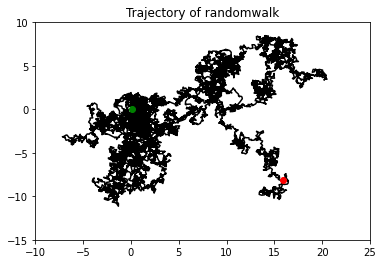

In [6]:
"""Plot the trajectory of randomwalk which has starting point on green dot and end point on red dot."""

width, height = -25, -10

search_range = 10

# t = tp.link_df(df, search_range)

fig, ax = plt.subplots()
ax.set_title('Trajectory of randomwalk')
ax.set_xlim([-10, 25])
ax.set_ylim([-15, 10])
ax.plot(df['x-micron'], df['y-micron'], 'black')
ax.plot(df['x-micron'].iloc[0], df['y-micron'].iloc[0],'og')
ax.plot(df['x-micron'].iloc[-1], df['y-micron'].iloc[-1], 'or')
# tp.plot_traj(t, ax=ax)


           <x>       <y>     <x^2>     <y^2>       msd            N    lagt
lagt                                                                       
1     0.001570 -0.000810  0.025427  0.024717  0.050144  9999.000000  0.0125
2     0.003147 -0.001659  0.051360  0.048582  0.099941  6665.555563  0.0250
3     0.004707 -0.002533  0.077067  0.073621  0.150688  4735.720241  0.0375
4     0.006275 -0.003437  0.102655  0.098650  0.201305  3635.239699  0.0500
5     0.007837 -0.004339  0.127813  0.123605  0.251418  2940.051944  0.0625
...        ...       ...       ...       ...       ...          ...     ...
96    0.140068 -0.099085  2.418544  2.278336  4.696880   155.117434  1.2000
97    0.141564 -0.100099  2.442013  2.297866  4.739880   153.506878  1.2125
98    0.143028 -0.101163  2.466107  2.317144  4.783251   151.929186  1.2250
99    0.144487 -0.102253  2.489914  2.335747  4.825661   150.383362  1.2375
100   0.145978 -0.103354  2.512856  2.354198  4.867054   148.868449  1.2500

[100 rows x

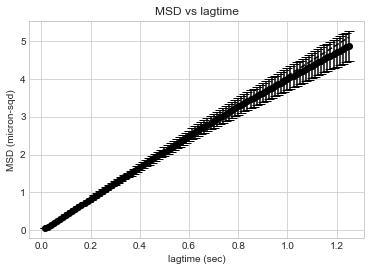

In [7]:
"""Plot the linear line of Mean-squared distance vs lagtime."""

from pylab import *
from scipy.optimize import curve_fit
plt.style.use('seaborn-whitegrid')


ylabel = '(micron-sqd)'
xlabel = '(sec)'
#Calculate the mean square distance (msd) and show the plot of msd versus lagtime
def linearFunc(x,slope):
    y = slope * x
    return y

max_lagtime = 100
w = []          #Stored uncertainty
msdcal = tp.msd(df, mpp=pix2micron, fps=80, max_lagtime=max_lagtime, detail=True)

print(msdcal)

x = msdcal['lagt']
y = msdcal['msd']

fig, ax = plt.subplots()
ax.set_title('MSD vs lagtime')
ax.set_ylabel(f'MSD {ylabel}')
ax.set_xlabel(f'lagtime {xlabel}')

for num in range(0,max_lagtime):
     weight = msdcal['msd'].iloc[num]/np.sqrt(msdcal['N'].iloc[num])
     w.append(weight)

msdcal['weight'] = w
noise = msdcal['weight']

a_fit,cov=curve_fit(linearFunc,x,y,sigma=noise,absolute_sigma=True)

slope = a_fit[0]

yfit = slope*x
ax.errorbar(x, y,
             yerr = w,
             fmt='ok', color='green', 
             errorevery=1, 
             alpha=1, 
 
             capsize = 5)

ax.plot(x, yfit, '--k')

print('Diffusion coefficient =', slope/4, ylabel, '/', xlabel)
print('slope = ', slope, ylabel, '/', xlabel)

In [8]:
msdcal

,<x>,<y>,<x^2>,<y^2>,msd,N,lagt,weight
lagt,,,,,,,,
1,0.001570,-0.000810,0.025427,0.024717,0.050144,9999.000000,0.0125,0.000501
2,0.003147,-0.001659,0.051360,0.048582,0.099941,6665.555563,0.0250,0.001224
3,0.004707,-0.002533,0.077067,0.073621,0.150688,4735.720241,0.0375,0.002190
4,0.006275,-0.003437,0.102655,0.098650,0.201305,3635.239699,0.0500,0.003339
5,0.007837,-0.004339,0.127813,0.123605,0.251418,2940.051944,0.0625,0.004637
...,...,...,...,...,...,...,...,...
96,0.140068,-0.099085,2.418544,2.278336,4.696880,155.117434,1.2000,0.377120
97,0.141564,-0.100099,2.442013,2.297866,4.739880,153.506878,1.2125,0.382563
98,0.143028,-0.101163,2.466107,2.317144,4.783251,151.929186,1.2250,0.388063


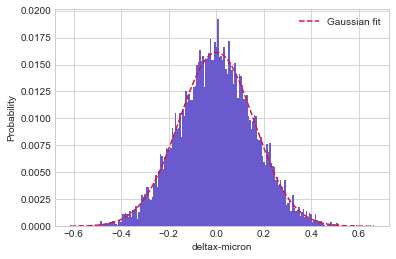

A = 0.01612454809244292 +- 0.0001257808218719314
B = 0.0005966886947782455 +- 0.0014228397684675268
C = 0.15796414750313278 +- 0.001422845581332724
Diffusion coefficient = 0.9981068758556596 micron-sqd/sec


In [9]:
"""Plot the Gaussian distribution of delta-x """

from scipy.optimize import curve_fit


xplot = 'deltax-micron'        #Insert the x-axis plot data here
x_data=df[xplot]
bins = 200

hist, bin_edges = np.histogram(x_data, bins=bins)
hist=hist/sum(hist)


n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist


#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gauss(x, A, B, C):
    return A * np.exp(-(x-B) ** 2 / (2 * C ** 2))

B = sum(x_hist*y_hist)/sum(y_hist)       
C = np.sqrt(sum(y_hist*(x_hist-B)**2)/sum(y_hist)) 


#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gauss,x_hist,y_hist,p0=[min(y_hist), max(y_hist), C])


fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gauss(x_hist_2,*param_optimised),'--', color='crimson',label='Gaussian fit')
plt.legend()


#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights, color='slateblue', bins=bins)


plt.xlabel(f'{xplot}')
plt.ylabel("Probability")
plt.grid("on")
plt.show()

print("A =", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("B =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("C =", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))

print("Diffusion coefficient =", np.power(param_optimised[2],2)/(2*frames2secs), 'micron-sqd/sec')

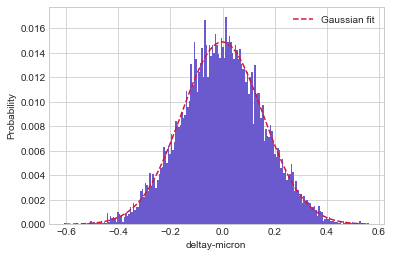

A = 0.014882750140321453 +- 0.00012619959153889351
B = -0.0015010111589968936 +- 0.001530052038596407
C = 0.15626587642679982 +- 0.0015301060814714726
Diffusion coefficient = 0.9767609654174348 micron-sqd/sec


In [10]:
"""Plot the Gaussian distribution of delta-y""" 

from scipy.optimize import curve_fit


xplot = 'deltay-micron'        #Insert the x-axis plot data here
x_data=df[xplot]
bins = 200

hist, bin_edges = np.histogram(x_data, bins=bins)
hist=hist/sum(hist)


n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist


#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gauss(x, A, B, C):
    return A * np.exp(-(x-B) ** 2 / (2 * C ** 2))

B = sum(x_hist*y_hist)/sum(y_hist)       
C = np.sqrt(sum(y_hist*(x_hist-B)**2)/sum(y_hist)) 


#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gauss,x_hist,y_hist,p0=[min(y_hist), max(y_hist), C])


fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gauss(x_hist_2,*param_optimised),'--', color='crimson',label='Gaussian fit')
plt.legend()


#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights, color='slateblue', bins=bins)


plt.xlabel(f'{xplot}')
plt.ylabel("Probability")
plt.grid("on")
plt.show()

print("A =", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("B =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("C =", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))

print("Diffusion coefficient =", np.power(param_optimised[2],2)/(2*frames2secs), 'micron-sqd/sec')

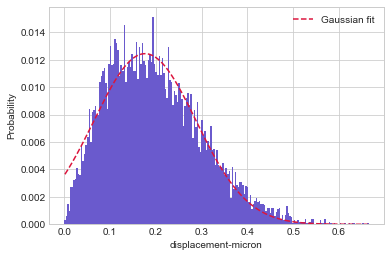

A =  0.012441818425002077 +- 0.00017282222165950625
B = 0.17637579468513734 +- 0.0018491367841325197
C = 0.11151639307771467 +- 0.002020108654009577


In [11]:
"""Plot the histogram of displacement of a particle"""

from scipy.optimize import curve_fit

xplot = 'displacement-micron'        #Insert the x-axis plot data here
x_data=df[xplot]
bins = 200

hist, bin_edges = np.histogram(x_data, bins=bins)
hist=hist/sum(hist)


n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist


#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gauss(x, A, B, C):
    return A * np.exp(-(x-B) ** 2 / (2 * C ** 2))

B = sum(x_hist*y_hist)/sum(y_hist)                  
C = np.sqrt(sum(y_hist*(x_hist-B)**2)/sum(y_hist)) 


#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gauss,x_hist,y_hist,p0=[min(y_hist), max(y_hist), C])


fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gauss(x_hist_2,*param_optimised),'--', color='crimson',label='Gaussian fit')
plt.legend()


#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights, color='slateblue', bins=bins)


plt.xlabel(f'{xplot}')
plt.ylabel("Probability")
plt.grid("on")
plt.show()

print("A = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("B =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("C =", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))



In [12]:
def HPW_mobility(x, eta, h, gamma, C1, C2, B1, B2):
    return (1 / 4*np.pi*eta*h)*(np.log(2/x) - gamma + 4*x/np.pi - x**2/2*np.log(2/x) / 1 - x**3/np.pi*(np.log(2/x)) + (C1*x**B1/1+C2*x**B2)) 

In [13]:
"""Directly calculate the diffusion coefficent by the variance of delta-x and delta-y
(Those diffusion coefficents have only 1 dimension)"""

from statistics import variance


vx = variance(df['deltax-micron'])
Dx = vx/(2*frames2secs)

print(Dx)


vy =  variance(df['deltay-micron'])
Dy = vy/(2*frames2secs)

print(Dy)

1.0169748493387365
0.988661653770993


In [14]:
msd = tp.imsd(df, mpp=pix2micron, fps=1/frames2secs, max_lagtime=max_lagtime)

In [15]:
motion_msd = tp.motion.msd(df, mpp=pix2micron, fps=1/frames2secs, max_lagtime=max_lagtime, detail=True)

In [18]:
motion_msd

,<x>,<y>,<x^2>,<y^2>,msd,N,lagt
lagt,,,,,,,
1,0.001570,-0.000810,0.025427,0.024717,0.050144,9999.000000,0.0125
2,0.003147,-0.001659,0.051360,0.048582,0.099941,6665.555563,0.0250
3,0.004707,-0.002533,0.077067,0.073621,0.150688,4735.720241,0.0375
4,0.006275,-0.003437,0.102655,0.098650,0.201305,3635.239699,0.0500
5,0.007837,-0.004339,0.127813,0.123605,0.251418,2940.051944,0.0625
...,...,...,...,...,...,...,...
96,0.140068,-0.099085,2.418544,2.278336,4.696880,155.117434,1.2000
97,0.141564,-0.100099,2.442013,2.297866,4.739880,153.506878,1.2125
98,0.143028,-0.101163,2.466107,2.317144,4.783251,151.929186,1.2250
